# GT Lab Practical 01-Introduction to Graphs Theory

## 1. Undirected Graph: Social Media Network
Given a graph `G(V, E)`, where `V` denotes the set of vertices and `E` denotes the set of edges, a connection be-
tween two vertices without direction is referred to as an undirected graph. In this part, we will simulate
a friendship network on the Facebook platform using the `NetworkX` library in Python. The graph `G(V, E)`
will represent the social network, where each vertex corresponds to a user account (e.g., A, B, C, . . .), and
each edge represents a friendship connection between two users (e.g., (A, B), (A, E), . . .) as illustrated in
the graph below.

![Screenshot 2025-10-18 at 2.56.29 in the afternoon.png](<attachment:Screenshot 2025-10-18 at 2.56.29 in the afternoon.png>)
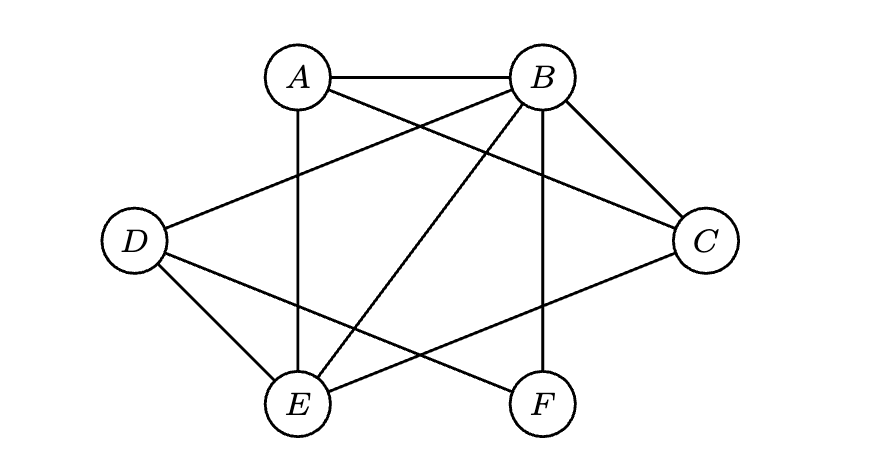

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
g = nx.Graph()

g.nodes()


NodeView(())

In [3]:
g.add_nodes_from(["A", "B", "C", "D", "E", "F"])
g.add_edges_from([("A", "B"), ("A", "C"), ("A", "E"), ("B", "C"), ("B", "D"), 
                  ("B", "F"), ("B", "E"), ("C", "E"), ("D", "E"), ("D", "F")])

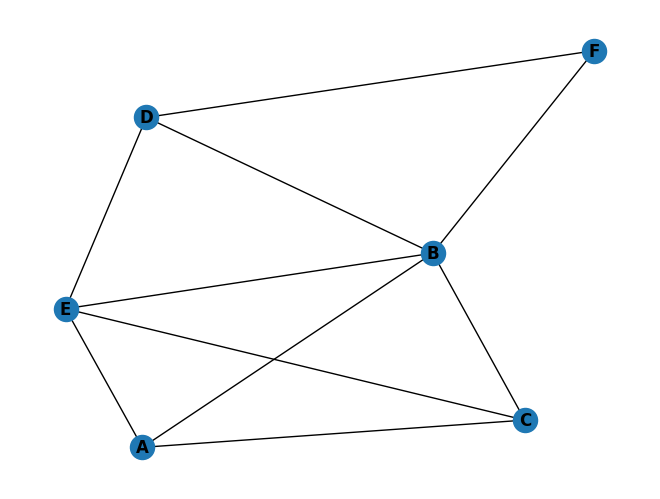

In [4]:
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

### **Question 1.** Graph Simulation in Python using `NetworkX` packages.

**(1.1).** Recall the network G by setting its name as graph using the function `nx.Graph()` to create an undirected graph.

In [5]:
G = nx.Graph()

**(1.2).** Create two lists, `ver` and `arc`, and a dictionary named `pos` to store all elements of the vertex set `V` , the edge set `E`, and the positions of the vertices in the graph network G, respectively.

In [6]:
ver = ["A", "B", "C", "D", "E", "F"]
arc = [("A", "B"), ("A", "C"), ("A", "E"), ("B", "C"), ("B", "D"), 
       ("B", "F"), ("B", "E"), ("C", "E"), ("D", "E"), ("D", "F")]
pos = {
    "A": (1, 1), 
    "B": (3, 1),
    "C": (4, 0),
    "D": (0, 0),
    "E": (1, -1),
    "F": (3, -1)
}

**(1.3).** Build the graph network `G(V, E)` by adding the vertices `V` and edges `E` obtained from variable `ver` and `arc` using the functions `graph.add_nodes_from()` and `graph.add_edges_from()`.

In [7]:
G.add_nodes_from(ver)
G.add_edges_from(arc)

**(1.4).** To visualize the graph, first draw the nodes using the function `nx.draw_networkx_nodes()`, then add labels to the nodes with `nx.draw_networkx_labels()` then draw the edges using `nx.draw_networkx_edges()` and finally `plt.show()` to display this graph.

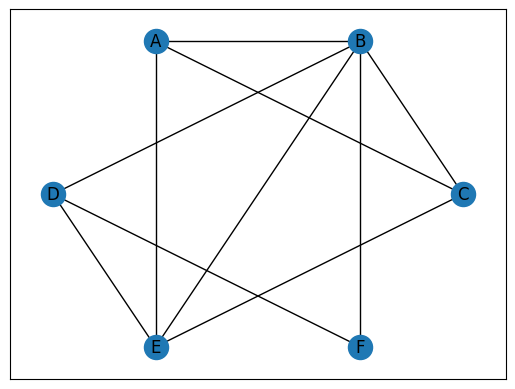

In [8]:
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

### **Question 2.** Some definition and graph properties.

**(2.1).** Let `Γ(v)` denote the set of neighbors of a vertex `v` in the graph G. Obtain the list results of `Γ(A)` and `Γ(E)` using the function `graph.neighbors()`. Then, plot the neighbors of vertex `A` in red and the neighbors of vertex `E` in blue.

In [9]:
gamma_A = G.neighbors('A')
gamma_E = G.neighbors('E')
print('neighbors of node A : ', list(gamma_A))
print('neighbors of node E : ', list(gamma_E))

neighbors of node A :  ['B', 'C', 'E']
neighbors of node E :  ['A', 'B', 'C', 'D']


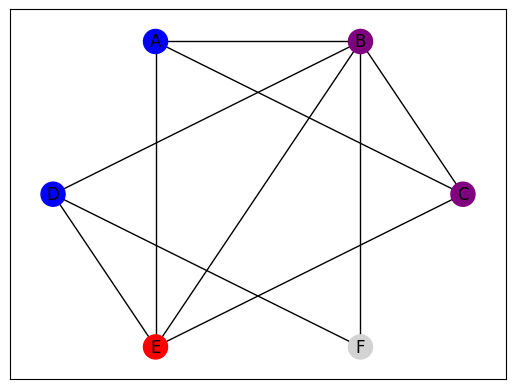

In [10]:
# color neighbors of A red, neighbors of E blue, both purple, others lightgray
neighbors_A = set(G.neighbors('A'))
neighbors_E = set(G.neighbors('E'))

color = []
for node in G.nodes():
    if node in neighbors_A and node in neighbors_E:
        color.append('purple')
    elif node in neighbors_A:
        color.append('red')
    elif node in neighbors_E:
        color.append('blue')
    else:
        color.append('lightgray')

nx.draw_networkx_nodes(G, pos, node_color=color)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)

plt.show()

**(2.2).** Recall that the function `graph.degree(v)` represents the degree of a node or vertex `v` in the graph `G` in `NetworkX`. Write a function named `show_connection()` to display the nodes that have the smallest and largest numbers of connections in this social network. Determine which user is the introvert (having the fewest connections) and which is the extrovert (having the most connections) in this network.

Introvert(s) (fewest connections = 2): ['F']
Extrovert(s) (most connections = 5): ['B']


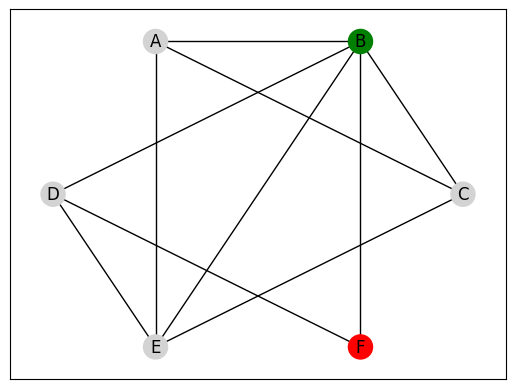

In [11]:
def show_connection(graph=G, pos=pos):
    """
    Display nodes with the smallest and largest numbers of connections (degrees).
    Prints introvert(s) (fewest connections) and extrovert(s) (most connections),
    plots the graph highlighting introverts in red and extroverts in green.
    Returns a tuple: (introverts, min_degree, extroverts, max_degree).
    """
    deg_dict = dict(graph.degree())
    if not deg_dict:
        print("Graph has no nodes.")
        return None

    min_deg = min(deg_dict.values())
    max_deg = max(deg_dict.values())

    introverts = [n for n, d in deg_dict.items() if d == min_deg]
    extroverts = [n for n, d in deg_dict.items() if d == max_deg]

    print(f"Introvert(s) (fewest connections = {min_deg}): {introverts}")
    print(f"Extrovert(s) (most connections = {max_deg}): {extroverts}")

    # prepare colors: introvert -> red, extrovert -> green, both -> purple, others -> lightgray
    node_colors = []
    for n in graph.nodes():
        if n in introverts and n in extroverts:
            node_colors.append('purple')
        elif n in introverts:
            node_colors.append('red')
        elif n in extroverts:
            node_colors.append('green')
        else:
            node_colors.append('lightgray')

    nx.draw_networkx_nodes(graph, pos, node_color=node_colors)
    nx.draw_networkx_labels(graph, pos)
    nx.draw_networkx_edges(graph, pos)
    plt.show()

    # return introverts, min_deg, extroverts, max_deg
show_connection()

In [12]:
print(G.degree('A'))
print(G.degree())

3
[('A', 3), ('B', 5), ('C', 3), ('D', 3), ('E', 4), ('F', 2)]


**(2.3).** Let `Λ(v, w)` be the set of vertices that form connections from node `v` to node `w` in the graph `G`. Recall that the function `all_simple_paths(graph,v,w)` in `NetworkX` can be used to obtain all possible paths between `v` and `w`. Write a function named `smartest_path()` to determine the path that involves the minimum number of user accounts between two nodes. Test your function to find how many intermediate users are required to reach user `E` starting from user `F` then add green colors on edges that show a path from `F` to `E`.

In [13]:
list(nx.all_simple_paths(G, 'E', 'F'))

[['E', 'A', 'B', 'D', 'F'],
 ['E', 'A', 'B', 'F'],
 ['E', 'A', 'C', 'B', 'D', 'F'],
 ['E', 'A', 'C', 'B', 'F'],
 ['E', 'B', 'D', 'F'],
 ['E', 'B', 'F'],
 ['E', 'C', 'A', 'B', 'D', 'F'],
 ['E', 'C', 'A', 'B', 'F'],
 ['E', 'C', 'B', 'D', 'F'],
 ['E', 'C', 'B', 'F'],
 ['E', 'D', 'B', 'F'],
 ['E', 'D', 'F']]

In [26]:
def smartest_path(graph, start, end):
    paths = list(nx.all_simple_paths(graph, start, end))

    min_len = min(len(p) for p in paths)
    shortest_paths = [p for p in paths if len(p) == min_len]
    return shortest_paths[0]

path = smartest_path(G, 'F', 'E')
print("Shortest path from F to E: ", path)
print("Number of intermediate users: ", len(path) - 2)


Shortest path from F to E:  ['F', 'B', 'E']
Number of intermediate users:  1


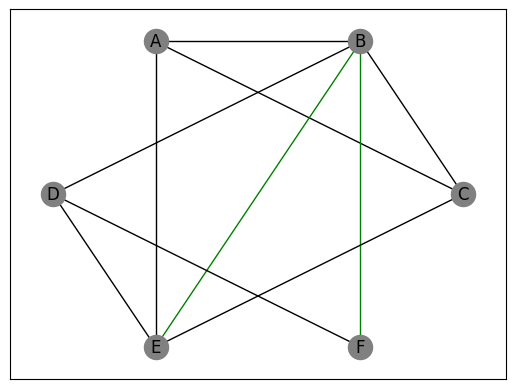

In [30]:
colors = []
for edge in G.edges():
    if edge in zip(path, path[1:]) or (edge[1], edge[0]) in zip(path, path[1:]):
        colors.append('green')
    else:
        colors.append('black')

nx.draw_networkx_nodes(G, pos, node_color='grey')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=colors)
plt.show()

### **Question 3.** User Account has been Hacked and new user is created.

**(3.1).** Assume that the user account `C` has been hacked, alert this notification by adding red color on user `C` and all connection to another users.

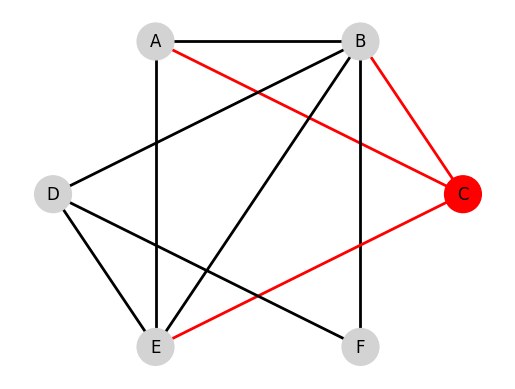

In [31]:
# Highlight hacked user 'C' and its incident edges in red
hacked = 'C'

node_colors = ['red' if n == hacked else 'lightgray' for n in G.nodes()]
edge_colors = ['red' if hacked in e else 'black' for e in G.edges()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
plt.axis('off')
plt.show()

**(3.2).** All user accounts that are friends with user `C` have been blocked. Therefore, you need to unfriend user C and remove this user from the network. Use the function graph.remove `edge(u, v)` to disconnect the edge between vertices u and v, and graph.remove `node(u)` to remove vertex `u` from the graph `G`. Finally, draw the updated graph network `G` without vertex `C`.

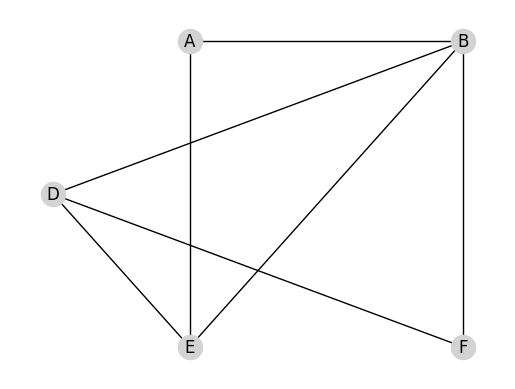

In [32]:
# Remove all edges connected to 'C'
for friend in list(G.neighbors('C')):
    G.remove_edge('C', friend)

# Remove node 'C' from the graph
G.remove_node('C')

# Draw the updated graph without 'C'
nx.draw_networkx_nodes(G, pos, node_color='lightgray')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()

## 2. Directed Graph: Currency Exchange Network
Setting the directed graph `G(V, E, W )` to represent the network of currency exchanges, where `V` is the set of currencies, `E` is the set of exchange relationships between currencies, and `W` is the set of exchange rates associated with each pair of connected currencies. To begin, the exchange rates of several currencies `USD`, `EUR`, `KHR`, `AUD`, and `JPY` at Bank `XYZ` on 16 October 2025 are provided in the table below.

|Currency   |XYZ Buys   |XYZ Sells  |
|-----------|-----------|-----------|
|USD/KHR    |4014       |4043       |
|EUR/USD    |1.125558   |1.181335   |
|JPY/KHR    |25.1539    |27.0393    |
|USD/JPY    |148.450589 |160.372745 |
|AUD/USD    |0.616106   |0.658097   |
|AUD/KHR    |2485.37    |2641.60    |

Each exchange rate represents the value of one unit of the foreign currency in comparison to one US dollar (USD). For example, the exchange from `USD` to `KHR` at Bank `XYZ` is represented by two columns: `XYZ` Sells at `4034`, meaning that for 1 `USD`, the bank sells it at this rate; and `XYZ` Buys at `4014`, meaning that for `1 USD`, the bank buys it at this rate and graph `G(V, E, W)` given by :

![Screenshot 2025-10-18 at 2.55.05 in the afternoon.png](<attachment:Screenshot 2025-10-18 at 2.55.05 in the afternoon.png>)
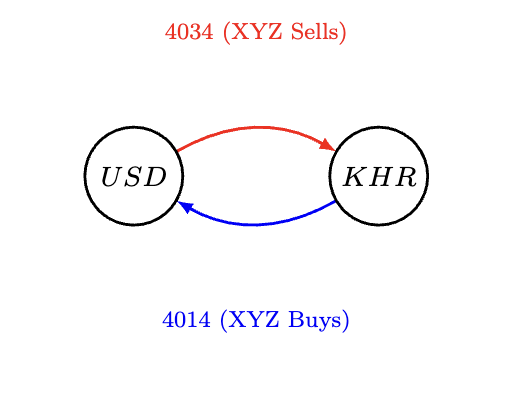

### **Question 1.** Model this problem as a graph and then simulate it in Python using the NetworkX package.

**(1.1).** Setting the graph of exchange rates `G(V, E, W)` as `G`, and creating this graph using the function `nx.DiGraph()`.

In [33]:
G = nx.DiGraph()

**(1.2).** Define two lists, `node` and `edge_var`, and a dictionary named `pos` to store all elements of the vertex set `V` , the edge with weight set `(E, W)`, and the positions of the vertices in the graph network `G`, respectively.

In [35]:
# define currency nodes
node = ["USD", "EUR", "KHR", "AUD", "JPY"]

# define directed weighted edges (u, v, weight)
# Convention used here: forward direction uses the bank's "sells" rate where given,
# and the reverse direction uses the reciprocal of the bank's "buys" rate.
edge_var = [
    ("USD", "KHR", 4043.00),          # USD -> KHR (XYZ sells USD at 4043 KHR)
    ("KHR", "USD", 1.0 / 4014.00),    # KHR -> USD (reciprocal of XYZ buys USD at 4014 KHR)
    ("EUR", "USD", 1.181335),         # EUR -> USD (XYZ sells EUR/USD at 1.181335)
    ("USD", "EUR", 1.0 / 1.125558),   # USD -> EUR (reciprocal of XYZ buys EUR/USD at 1.125558)
    ("JPY", "KHR", 27.0393),          # JPY -> KHR (XYZ sells JPY/KHR at 27.0393)
    ("KHR", "JPY", 1.0 / 25.1539),    # KHR -> JPY (reciprocal of XYZ buys JPY/KHR at 25.1539)
    ("USD", "JPY", 160.372745),       # USD -> JPY (XYZ sells USD/JPY at 160.372745)
    ("JPY", "USD", 1.0 / 148.450589), # JPY -> USD (reciprocal of XYZ buys USD/JPY at 148.450589)
    ("AUD", "USD", 0.658097),         # AUD -> USD (XYZ sells AUD/USD at 0.658097)
    ("USD", "AUD", 1.0 / 0.616106),   # USD -> AUD (reciprocal of XYZ buys AUD/USD at 0.616106)
    ("AUD", "KHR", 2641.60),          # AUD -> KHR (XYZ sells AUD/KHR at 2641.60)
    ("KHR", "AUD", 1.0 / 2485.37)     # KHR -> AUD (reciprocal of XYZ buys AUD/KHR at 2485.37)
]

# positions for plotting the currency nodes
pos = {
    "USD": (0, 0),
    "EUR": (-1, 1),
    "JPY": (1, 1),
    "KHR": (0, -1),
    "AUD": (-1, -1)
}

**(1.3).** Build the graph network `G(V, E, W)` by adding the vertices `V` and weight of edges `(E, W)` obtained from variable `node` and `edge_var` using the functions `graph.add_nodes_from()` and
`graph.add_weighted_edges_from()`.

In [36]:
G.add_nodes_from(node)
G.add_weighted_edges_from(edge_var)

**(1.4).** Given an example of the exchange rate where Bank XYZ Sells between USD and JPY, and Bank XYZ Buys between EUR and USD, using the function `nx.get_edge_attributes()`.

In [37]:
# Get all edge weights from the directed currency exchange graph
weights = nx.get_edge_attributes(G, 'weight')

# Example: Bank XYZ Sells USD/JPY (USD -> JPY)
usd_jpy_sell = weights.get(('USD', 'JPY'))
print("Bank XYZ Sells USD/JPY rate:", usd_jpy_sell)

# Example: Bank XYZ Buys EUR/USD (EUR -> USD)
eur_usd_buy = weights.get(('EUR', 'USD'))
print("Bank XYZ Buys EUR/USD rate:", eur_usd_buy)

Bank XYZ Sells USD/JPY rate: 160.372745
Bank XYZ Buys EUR/USD rate: 1.181335


**(1.5).** To visualize the graph, first draw the nodes using the function `nx.draw_networkx_nodes()`. Next, add labels to the nodes with `nx.draw_networkx_labels()`. Then, draw the edges using
`nx.draw_networkx_edges()` with an additional attribute called connectionstyle to modify the shape of the edges. Finally, use `plt.show()` to display the graph.

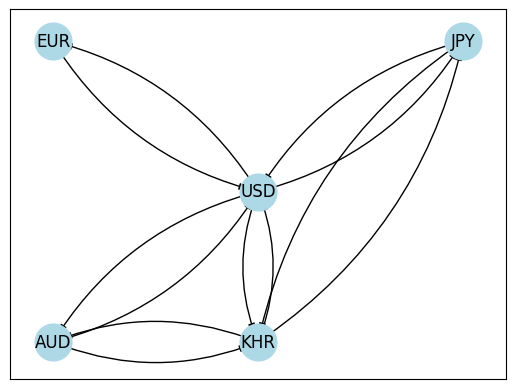

In [38]:
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True, connectionstyle='arc3,rad=0.2')
plt.show()

### **Question 2.** Some definition and graph properties.

**(2.1).** Define $Γ(v)$, $Γ^+(v)$, and $Γ^−(v)$ as the sets of neighbors, successors, and predecessors of a vertex $v$ in graph $G$, respectively. Recall the corresponding functions in `NetworkX`: `G.neighbors()`, `G.successors()`, and `G.predecessors()`. Determine the sets $Γ(AUD)$, $Γ^+(USD)$, and $Γ^−(EU R)$.

**(2.2).** Suppose you hold a currency in JPY . Identify the currencies with which it can be exchanged.

**(2.3).** Let $γ+(u, v)$ is a set of vertices following direction from $u$ to $v$ in graph $G$. Recall that the function `all_simple_paths(graph,u,v)` in `NetworkX` can be used to obtain all possible paths between $u$ and $v$. Find possible path of currencies network from JPY to KHR.

**(2.4).** Is it possible, in the case where you hold a currency in EUR, to exchange it into KHR? If so, how can this exchange process be represented and described the network in graph model?

**(2.5).** Let $ϕ+(u)$ be a set of vertices following direction from $u$ to $u$ self in graph $G$ was called cycle. Find the circle of vertex USD by using function `nx.simple_cycles()`.

### **Question 3.** Basic network analysis of exchange rates at Bank XYZ.

**(3.1).** Suppose you have 1000 (USD) and sequentially exchange it into other currencies before converting it back to your original currency (USD). Would this series of exchanges result in a profit? If so, calculate the total amount you would receive.

**(3.2).** Now assume that you have 1000 (EUR). The objective is to determine the most profitable way to exchange it into (KHR).
